In [6]:
# Question 1a
# Calculate:
# 1. absolute error 
# 2. relative error 
# of a and b
import numpy as np

a = 5616.65532
b = 5517.16651

abs_err = np.abs(a - b)
rel_err = np.abs(a - b) / np.abs(a)

print(f"Absolute error: {abs_err}")
print(f"Relative error: {rel_err}")

Absolute error: 99.48880999999983
Relative error: 0.017713177030062054


In [ ]:
# Question 1b
# Calculate error based on the combined method.
# Does it behave like absolute error or relative error?
combine_err = np.abs(a - b) / (np.abs(a) + 1)
print(combine_err)
# Relative error
# |a|>>1, it will behave like relative error.

0.01771002390370932


---

In [12]:
# Question 2
# Consider the following linear problem: Ax = 0
A = np.array([[.556, .687], [.556, .685]])

In [ ]:
# Print out the condition number of A.
print(np.linalg.cond(A))

1402.3967689494852


### Think: Is this a well conditioned problem?

> ill-conditioned problem: Small changes in the input cause large changes in the output solution.

The condition number is `1402 >> 1`. <br>
This is a ill-conditioned problem.


---

$$
\frac{\partial f}{\partial x} = -\frac{f(x)}{x}
$$

<Axes: >

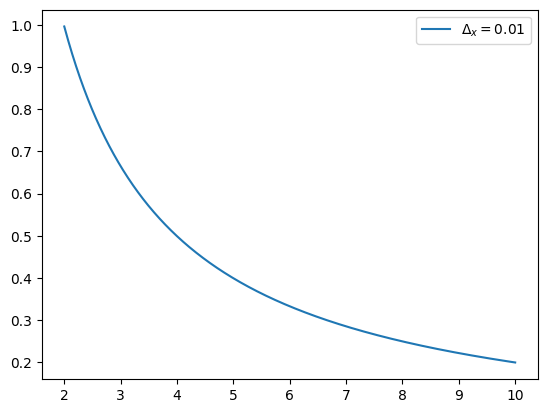

In [ ]:
# Question 3: 
# Solve the ODE by backward difference approximation.
# Initial condition: f(10) = 0.2

import numpy as np
import seaborn as sns

(x0, xN) = (2.0, 10.0)
N = 801
x = np.linspace(x0, xN, N)
#-----------------------------------------------------------------
dx = x[1] - x[0]
fx = np.zeros_like(x)
fx[-1] = 0.2

for i in np.arange(N - 1, 0, -1):
    fx[i - 1] = fx[i] * (1.0 + dx / x[i])
#-----------------------------------------------------------------
sns.lineplot(
    x = x, 
    y = fx, 
    label = '$\\Delta_x=$' + str(format(dx, '.9g'))
)

---

$$
\frac{\partial f}{\partial x} = -\frac{f(x)}{x}
$$

C:\Users\26891\AppData\Local\Temp\ipykernel_22820\3082944040.py:27: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  fx = spsolve(A, b)


<Axes: >

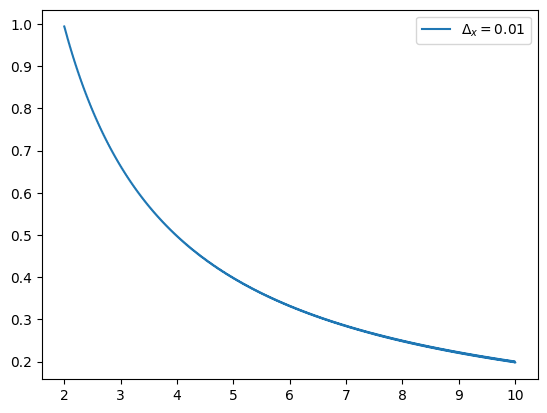

In [28]:
# Question4: 
# Solve the ODE by center difference approximation.
# Initial condition: f(2) = 1.0, f(10) = 0.2

import numpy as np
import seaborn as sns
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve 

(x0, xN) = (2.0, 10.0)
N = 801
x = np.linspace(x0, xN, N)
#-------------------implement your code here----------------------
dx = x[1] - x[0]

upper_diag = x[:-1] / (2.0 * dx)
diag = np.ones_like(x)
lower_diag = - x[1:] / (2.0 * dx)

diagonals = [lower_diag, diag, upper_diag]
A = diags(diagonals, [-1, 0, 1])

b = np.zeros_like(x)
b[0] = x[0] / (2.0 * dx) * 1.0
b[-1] = - x[-1] / (2.0 * dx) * 0.2

fx = spsolve(A, b)
#-----------------------------------------------------------------
sns.lineplot(
    x = x, 
    y = fx,
    label = '$\\Delta_x=$' + str(format(dx, '.9g'))
)